# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query URL

units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [4]:
# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

In [5]:
# Loop through cities
for city in cities:

# Response for API Call

    response_json = requests.get(query_url + city).json()
    
# Start the error handling
# Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
# Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")


City Name: katobu, City ID: 1640972
City Name: mardin, City ID: 304797
City Name: ushuaia, City ID: 3833367
City Name: punta arenas, City ID: 3874787
City Name: jaisalmer, City ID: 1269507
City Name: banda aceh, City ID: 1215502
City Name: mataura, City ID: 6201424
City Name: rikitea, City ID: 4030556
City Name: non thai, City ID: 1608131
City Name: atuona, City ID: 4020109
City Name: new norfolk, City ID: 2155415
City Name: hobart, City ID: 2163355
City Name: kaitangata, City ID: 2208248
That record does not exist, searching for next record...
City Name: severo-kurilsk, City ID: 2121385
City Name: elat, City ID: 295277
City Name: marzuq, City ID: 72181
City Name: butaritari, City ID: 2110227
City Name: kapaa, City ID: 5848280
City Name: ilulissat, City ID: 3423146
That record does not exist, searching for next record...
City Name: carnarvon, City ID: 2074865
City Name: seoni malwa, City ID: 1256823
City Name: lompoc, City ID: 5367788
City Name: honiara, City ID: 2108502
City Name: ban

That record does not exist, searching for next record...
City Name: victoria, City ID: 1819729
City Name: dergaon, City ID: 1273166
City Name: topolobampo, City ID: 3981345
City Name: galesong, City ID: 1644605
That record does not exist, searching for next record...
City Name: rawson, City ID: 3839307
City Name: salalah, City ID: 286621
City Name: povoa de varzim, City ID: 2735787
City Name: klaksvik, City ID: 2618795
City Name: srandakan, City ID: 1626493
City Name: kasongo-lunda, City ID: 2315026
City Name: baykit, City ID: 1510689
That record does not exist, searching for next record...
City Name: bilma, City ID: 2446796
City Name: beloeil, City ID: 5898138
City Name: potamia, City ID: 734496
City Name: ketchikan, City ID: 5554428
City Name: de-kastri, City ID: 2126018
That record does not exist, searching for next record...
City Name: labuan, City ID: 1733782
City Name: boa vista, City ID: 3664980
That record does not exist, searching for next record...
City Name: turukhansk, City

City Name: constitucion, City ID: 3893726
That record does not exist, searching for next record...
City Name: aksha, City ID: 2028028
City Name: mareeba, City ID: 2158767
City Name: teno, City ID: 3869979
City Name: tankhoy, City ID: 2015576
City Name: taltal, City ID: 3870243
City Name: dapaong, City ID: 2367164
City Name: polunochnoye, City ID: 1494482
City Name: ponta delgada, City ID: 3372783
City Name: panzhihua, City ID: 6929460
That record does not exist, searching for next record...
City Name: careiro da varzea, City ID: 3402920
City Name: husavik, City ID: 2629833
City Name: aitape, City ID: 2101169
City Name: san quintin, City ID: 3984997
City Name: marawi, City ID: 1701054
City Name: maragogi, City ID: 3395458
City Name: smithers, City ID: 6149996
City Name: karaman, City ID: 443187
City Name: palana, City ID: 2122262
City Name: luba, City ID: 2309528
City Name: copiapo, City ID: 3893656
City Name: dickinson, City ID: 4686163
City Name: umm lajj, City ID: 100926
City Name: q

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Dataframe

cities_data_df = pd.DataFrame({"City ID": city_id_list, "City Name": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_data_df.head()

,City ID,City Name,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,1640972,Katobu,ID,-4.9408,122.5276,73.40,96,82,5.88
1,304797,Mardin,TR,37.3131,40.7436,77.70,34,0,3.67
2,3833367,Ushuaia,AR,-54.8000,-68.3000,37.06,75,40,32.21
3,3874787,Punta Arenas,CL,-53.1500,-70.9167,41.11,65,75,27.63
4,1269507,Jaisalmer,IN,26.9147,70.9181,83.16,58,1,23.73


In [7]:
# Export to .csv file
#cities_data_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
sorted_humidity_df = cities_data_df.sort_values("Humidity", ascending = "False")
sorted_humidity_df

,City ID,City Name,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
540,108410,Riyadh,SA,24.6877,46.7219,93.34,10,0,7.87
263,2448083,Agadez,NE,19.7500,10.2500,95.43,10,89,11.70
135,142255,Bāfq,IR,31.6128,55.4107,87.33,10,0,2.77
525,5503914,Fallon,US,39.4735,-118.7774,89.31,11,75,4.61
251,1120985,Zaranj,AF,30.9667,61.8833,91.36,11,0,19.24
...,...,...,...,...,...,...,...,...,...
160,933995,Souillac,MU,-20.5167,57.5167,68.38,100,75,3.44
269,934322,Mahébourg,MU,-20.4081,57.7000,68.29,100,75,3.44
444,2027244,Bagdarin,RU,54.4333,113.6000,55.71,100,100,2.24
129,1106677,Bambous Virieux,MU,-20.3428,57.7575,68.25,100,75,3.44


In [9]:
#  Get the indices of cities that have humidity over 100%.

# No cities with Humidity greater than 100%

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:

# No Cities with Humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

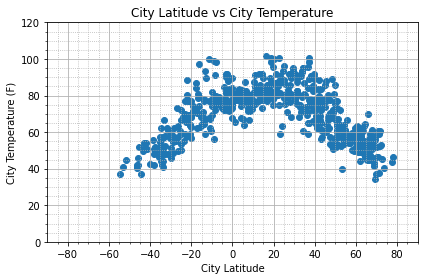

In [12]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Temperature"]


plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Temperature (F)")
plt.title("City Latitude vs City Temperature")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(0,120)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show


## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

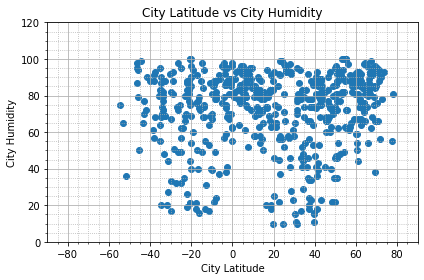

In [13]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Humidity"]


plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs City Humidity")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(0,120)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

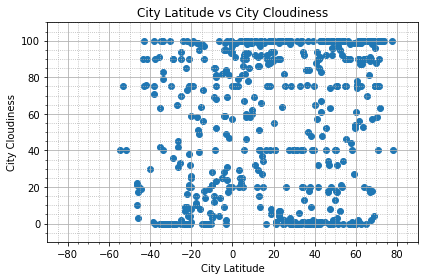

In [14]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Clouds"]

plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness")
plt.title("City Latitude vs City Cloudiness")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(-10,110)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

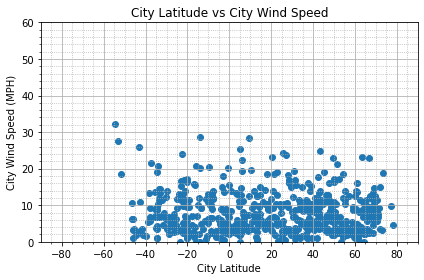

In [15]:
x_values = cities_data_df["Lat"]
y_values = cities_data_df["Wind Speed"]

plt.scatter(x_values, y_values)

#Formatting Labels

plt.xlabel("City Latitude")
plt.ylabel("City Wind Speed (MPH)")
plt.title("City Latitude vs City Wind Speed")

#Formatting Scale

plt.xlim(-90,90)
plt.ylim(0, 60)

plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

#Diplay Plot
plt.show

## Linear Regression

In [48]:
northern_lat = cities_data_df.loc[cities_data_df["Lat"]>= 0]
southern_lat = cities_data_df.loc[cities_data_df["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

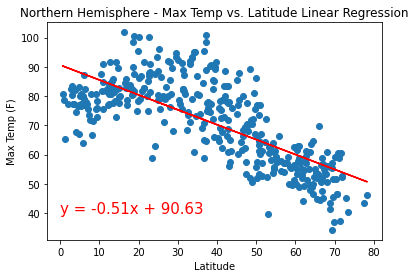

In [108]:
x_values = northern_lat['Lat']
y_values = northern_lat['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)


# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

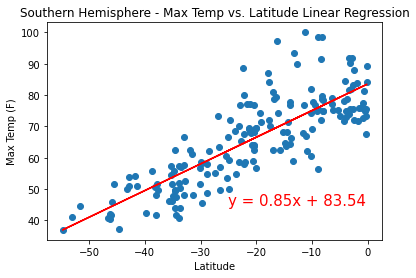

In [109]:
x_values = southern_lat['Lat']
y_values = southern_lat['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

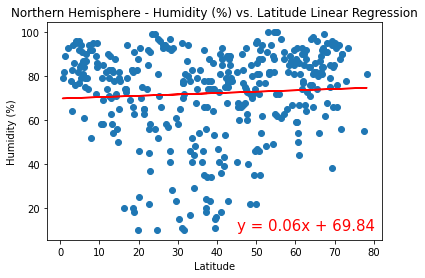

In [110]:
x_values = northern_lat['Lat']
y_values = northern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

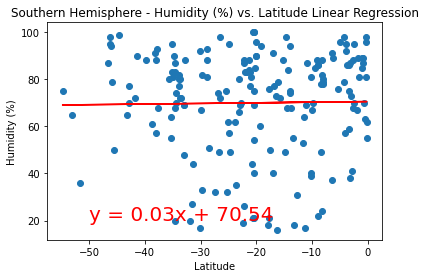

In [111]:
x_values = southern_lat['Lat']
y_values = southern_lat['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=20,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

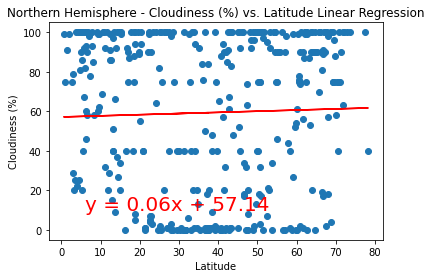

In [112]:
x_values = northern_lat['Lat']
y_values = northern_lat['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

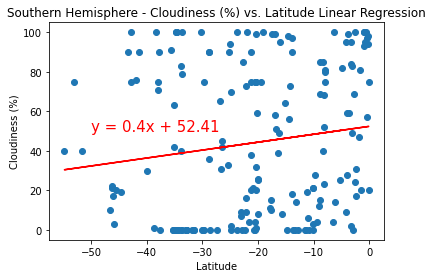

In [113]:
x_values = southern_lat['Lat']
y_values = southern_lat['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

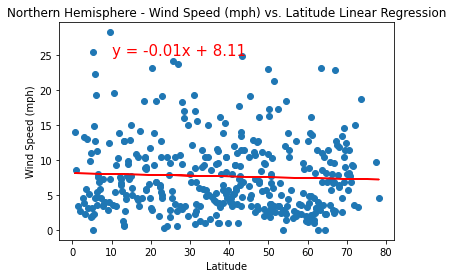

In [114]:
x_values = northern_lat['Lat']
y_values = northern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

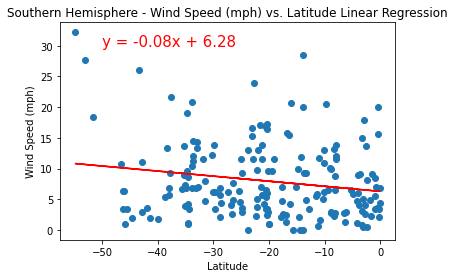

In [115]:
x_values = southern_lat['Lat']
y_values = southern_lat['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
